## STAT 350, Fall 2016

### Lab 2: Due Friday, Oct 28

You must complete this lab with one partner.  The partner for this lab should not be the same person you worked with on lab 1.  Both partners are expected to contribute equally to completing all parts of the
assignment. You may also discuss the labs with other students in the class, but you may not share
computer code with anyone other than your partner.

In all parts of the lab you should use **simulation** to approximate distributions and probabilities.  While many of these problems have analytical solutions, you should not just be plugging numbers into formulas.  Rather, you should define a probability space of possible outcomes, define appropriate random variables, simulate many values of the random variables, and then use the simulated values to estimate the objects of interest.  Except for a few parts, you should use Symbulate commands exclusively. (See the Symbulate documentation for descriptions of the commands and examples.)

**Note:** Follow the instructions [here](http://calpoly.edu/~dsun09/python.html) to reinstall Symbulate to ensure that you have the latest version.  (You do NOT need to reinstall Python/Anaconda/Jupyter.)

In [1]:
# remember to run these lines first
from symbulate import *
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Micrometeors and the International Space Station

Suppose that (harmless) micrometeors strike the International Space Station (ISS) at rate 1.5 per hour on average.

## Question 1

In Question 1, you will investigate the distribution of stikes over time various different assumptions.

### Model 1

Suppose that the number of strikes over any period of time has a Poisson distribution.

a. Simulate the distribution of the number of strikes that occur in the next 3 hours. (**Hint:** Based on the rate at which meteors strike the ISS, what must the mean of the Poisson distribution be?) Make a histogram of the distribution, and approximate the mean and the variance.

4.4988250000000001

4.514314619374999

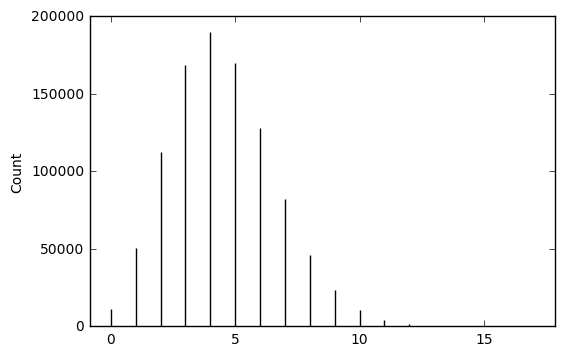

In [2]:
strikes = RV(Poisson(lam = 4.5)).sim(1000000)
strikes.hist(type="line")
strikes.mean()
strikes.var()

b. Estimate the probability that there are at least 8 strikes in the next 3 hours.

In [3]:
strikes = RV(Poisson(lam = 4.5)).sim(1000000)
def feight(x):
    return x >= 8
strikes.apply(feight).tabulate(relfreq = True)

False,0.913428
True,0.086572
Total,1.0


### Model 2

Now suppose that in each 1 *minute* of time there is either 1 strike or no strikes.  (That is, we are assuming that there is no more than 1 strike in a minute).  Also suppose that minute-to-minute strikes occur independently of each other, and the probability that a strike occurs in any minute is 1.5/60.  (We have defined the probability this way so that the mean number of strikes in a minute is 1.5/60, consistent with the overall average rate at which strikes occur.)

a. Simulate the distribution of the number of strikes that occur in the next 3 hours.  Make a histogram of the distribution, and approximate the mean and the variance.

4.5148299999999999

4.3728400710999988

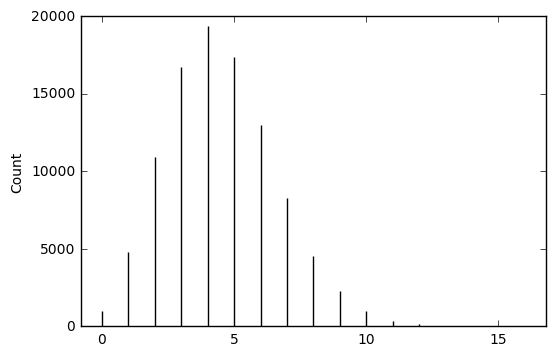

In [4]:
strikes = RV(BoxModel([1, 0], probs = [1.5/60, 58.5/60], size = 3*60)).sim(100000).apply(sum)
strikes.hist(type="line")
strikes.mean()
strikes.var()

b. Estimate the probability that there are at least 8 strikes in the next 3 hours.

In [5]:
strikes = RV(BoxModel([1, 0], probs = [1.5/60, 58.5/60], size = 3*60)).sim(100000).apply(sum)
def feight(x):
    return x >= 8
strikes.apply(feight).tabulate(relfreq = True)

False,0.91639
True,0.08361
Total,1.0


### Model 3

Now suppose that the time elapsed between any two strikes has an Exponential distribution with mean 40 minutes, and suppose that times between strikes are independent.

a. Simulate the distribution of the number of strikes that occur in the next 3 hours.  Make a histogram of the distribution, and approximate the mean and the variance.

**Hint:** Simulate so many strikes that the total time easily exceeds 3 hours. How will you use these exponential random variables you just simulated to count how many strikes occurred in 3 hours? Write a function that counts up how many events occurred in 3 hours. You may want to try part (b) before attempting this part.

4.5317999999999996

4.5307887599999992

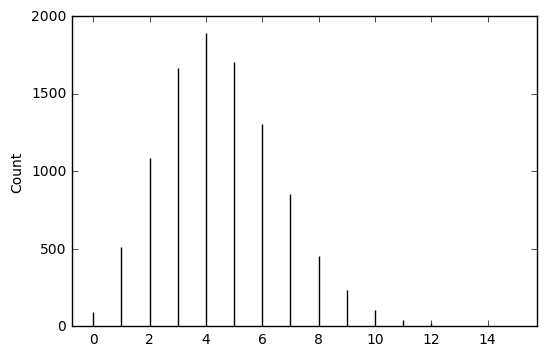

In [6]:
def num_strikes_in_3_hours(x):
    strikes = RV(Exponential(lam = 1/40)).sim(500)
    time = 0
    numstrikes = 0
    for i in range(len(strikes)):
        time += strikes[i]
        if time >= 180:
            return numstrikes
        numstrikes += 1
        
model = Uniform(a = 0, b = 1)
X = RV(model, num_strikes_in_3_hours).sim(10000)
X.hist(type="line")
X.mean()
X.var()

b. Estimate the probability that there are at least 8 strikes in the next 3 hours.  

**Hint:** Consider the time at which the 8th strike occurs.

In [7]:
def num_strikes_in_3_hours(x):
    strikes = RV(Exponential(lam = 1/40)).sim(500)
    time = 0
    numstrikes = 0
    for i in range(len(strikes)):
        time += strikes[i]
        if time >= 180:
            return numstrikes
        numstrikes += 1
        
model = Uniform(a = 0, b = 1)
X = RV(model, num_strikes_in_3_hours).sim(10000)
def feight(x):
    return x >= 8
X.apply(feight).tabulate(relfreq = True)

False,0.9116
True,0.0884
Total,1.0


### Conclusions

Review your answers to the three models above.  In each model, we made what appeared to be different assumptions.  Does it seem that the distribution of the number of strikes is the same under each of these sets of assumptions?  Discuss briefly.

Through the three models, we observed simmilar distributions. They all have simmilar means, but interestingly, they have slightly different variances. These differences in variances can be explained with the models used. For example, in Model 2, I used a box model. This model creates an upper bound on the number of strikes that may occur over the 3 hours.  This eliminates the unlikely values that go above that upper bound that are not present in the Poisson or Exponential distributions, lowering the variance of the distribution.

## Question 2

a. Suppose that there is exactly 1 strike in the next 2 hours.  Make a histogram of the (conditional) distribution of the time at which this 1 strike occurred in the 0 to 2 hour window, and find its mean and variance.  (Hint: simulate the times of the first two strikes and filter accordingly.)  What can you say about this distribution?

33.829073567366549

800.18775351017268

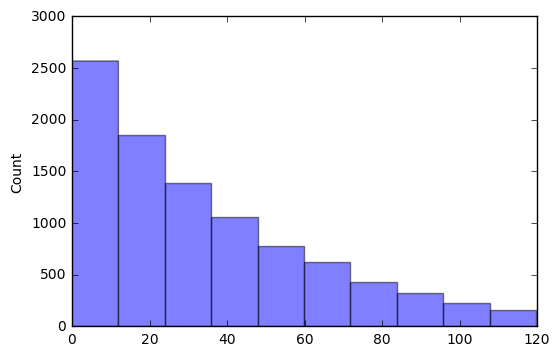

In [8]:
strike = Exponential(lam = 1/40)**2
X = RV(strike, min)
Y = RV(strike, max)
strikes = (X & Y).sim(100000)
def valid(x):
    return x[0] <= 120 and x[1] > 120
fstrike = strikes.filter(valid).component(0)
fstrike.hist()
fstrike.mean()
fstrike.var()

It has the general shape of an exponential distribution. Its mean and variance are lowered because of the restrictions placed upon the times at which the first and second strikes are allowed to happen.

b. Count strikes starting now, and consider the time elapsed between now until the 8th strike occurs.  Make a histogram of the distribution of the elapsed time until the 8th strike, and find its mean and variance.

453.96183006267785

815.0178905885906

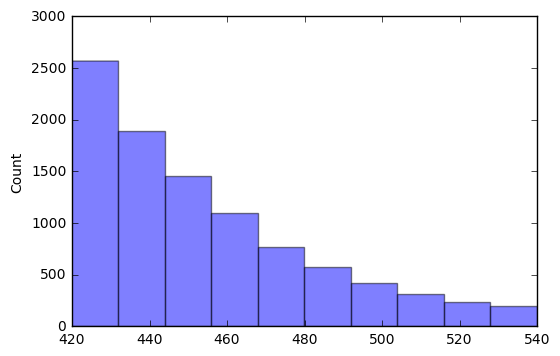

In [11]:
strike = Exponential(lam = 1/40)**2
X = RV(strike, min)
Y = RV(strike, max)
strikes = (X & Y).sim(100000)
def valid(x):
    return x[0] <= 120 and x[1] > 120
fstrike = strikes.filter(valid).component(0)
for i in range(len(fstrike)):
    fstrike[i] += 60*7
fstrike.hist()
fstrike.mean()
fstrike.var()

c. Repeat part b but for the time until the 40th strike occurs.  What is true about this distribution that was not true in part b?

2373.223425469429

790.47497936153673

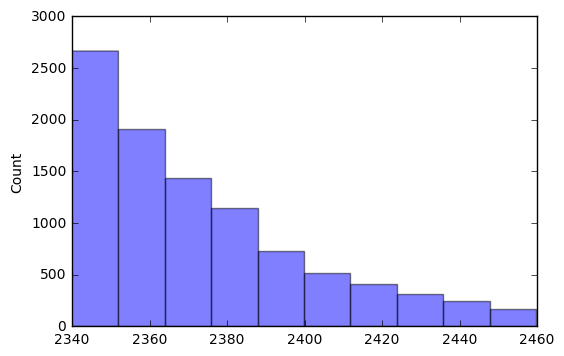

In [12]:
strike = Exponential(lam = 1/40)**2
X = RV(strike, min)
Y = RV(strike, max)
strikes = (X & Y).sim(100000)
def valid(x):
    return x[0] <= 120 and x[1] > 120
fstrike = strikes.filter(valid).component(0)
for i in range(len(fstrike)):
    fstrike[i] += 60*39
fstrike.hist()
fstrike.mean()
fstrike.var()

It takes an even longer time, making the mean larger with no change to the variance.

## Submission Instructions

Before you submit this notebook, click the "Kernel" drop-down menu at the top of this page and select "Restart & Run All". This will ensure that all of the code in your notebook executes properly.

We will re-run your notebook before grading your answers. You will lose points for a notebook with cells that do not run, even if your answers are correct, so please do not skip this step.